#### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

The key features of the wine quality dataset and their importance in predicting wine quality are:

- Fixed acidity: The amount of fixed acidity, mainly tartaric acid, in the wine has an impact on perception of wine quality. Higher fixed acidity can make wine taste sour and acidic. So this feature is important in determining wine quality.

- Volatile acidity: Volatile acidity refers to the amount of acetic acid in the wine, which is produced during fermentation. High volatile acidity can make wine smell and taste vinegar-like, negatively impacting quality. So this feature is important.

- Citric acid: The amount of citric acid contributes to wine's freshness, flavor and aroma. Moderate levels of citric acid tend to produce higher quality wines.

- Residual sugar: The amount of residual sugar left after fermentation is finished. Low to moderate residual sugar levels are preferred for higher quality wines. Too much sugar can make wine taste excessively sweet.

- Chlorides: The amount of chlorides, mainly potassium and sodium chlorides, in wine impacts its quality. Higher chlorides can make wine taste salty and bitter.

- pH: The pH level of wine influences chemical reactions that impact balance, flavor and color stability. Moderate pH levels around 3 to 4 are preferred for quality wines.

- Sulphates: Sulphates act as antioxidants and preservatives in wine but higher levels can make wine taste bitter and sulfury. Moderate amounts are preferred.

- Alcohol: The alcohol by volume, indicating the intensity of wine. Moderate alcohol levels from 10% to 14% are often seen as ideal for quality wines.

So in summary, features like fixed and volatile acidity, residual sugar, chlorides, sulphates, pH and alcohol are important in determining perceptive attributes that impact the overall quality of wine.

#### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the wine quality dataset, so no handling is required.

There are several advantages and disadvantages to different imputation techniques:

Mean Imputation:

Advantages:
- Simple and easy to implement
- Works well for large amounts of missing data

Disadvantages:
- Ignores the underlying distribution of the data 
- Can increase variance and decrease accuracy

Median Imputation:  

Advantages:
- Also simple to implement
- More robust than mean imputation since it's not sensitive to outliers

Disadvantages:
- Still ignores the underlying distribution

Mode imputation:

Advantages:
- Very easy to implement since it just requires calculating the mode
- Works well when the variable has a very skewed distribution where the mode represents a large portion of the data

Disadvantages:
- The mode may not be a very representative value for the variable, especially if the distribution is not highly skewed
- May produce an imputed value that doesn't actually occur in the data

#### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [54]:
df1 = pd.read_csv('stud.csv')
df1.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [3]:
"""
There is no null value
"""

print(df1.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [4]:
"""
The data is mix of categorical and numerical data.
"""

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
"""
There is no duplicate data
"""

df1[df1.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [6]:
"""
The means of each subjects are identical ranging from 66 to 68.
The standard deviation are identical too ranging from 14.6-15.19
The minimum scores are however ranging from 0-17.
"""

df1.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
"""
dividing Numerical and categorical data
"""

num = [i for i in df1.columns if df1[i].dtype!='O']
cat = [i for i in df1.columns if df1[i].dtype=='O']

In [56]:
"""
Calculating Average and Total of the subjects.
"""

df1['Total']=df1[num[0]]+df1[num[1]]+df1[num[2]]
df1['Average']=df1['Total']/3
df1.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


## Analysis

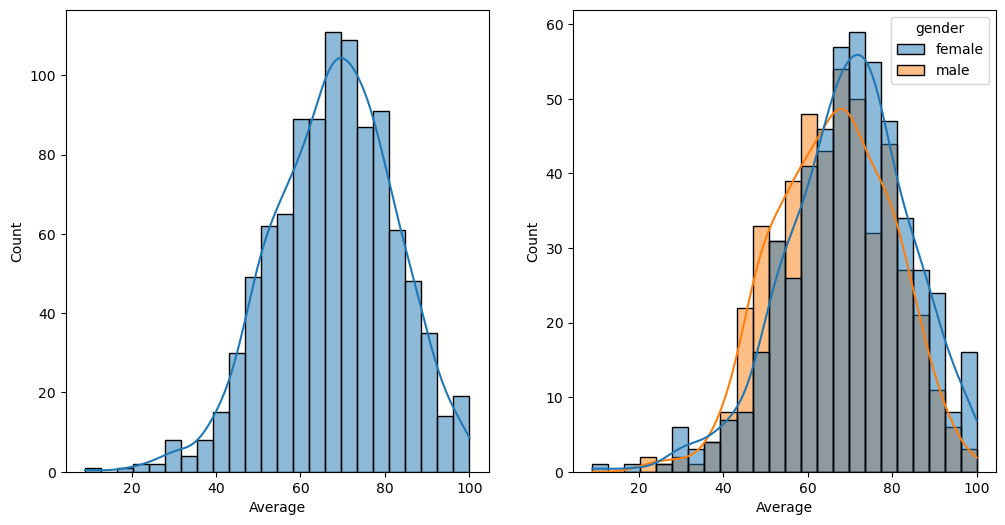

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
sns.histplot(x='Average',data=df1,kde=True)
plt.subplot(122)
sns.histplot(x='Average',data=df1,kde=True,hue='gender')
plt.show()


- Female students tend to have better average score than Male students.


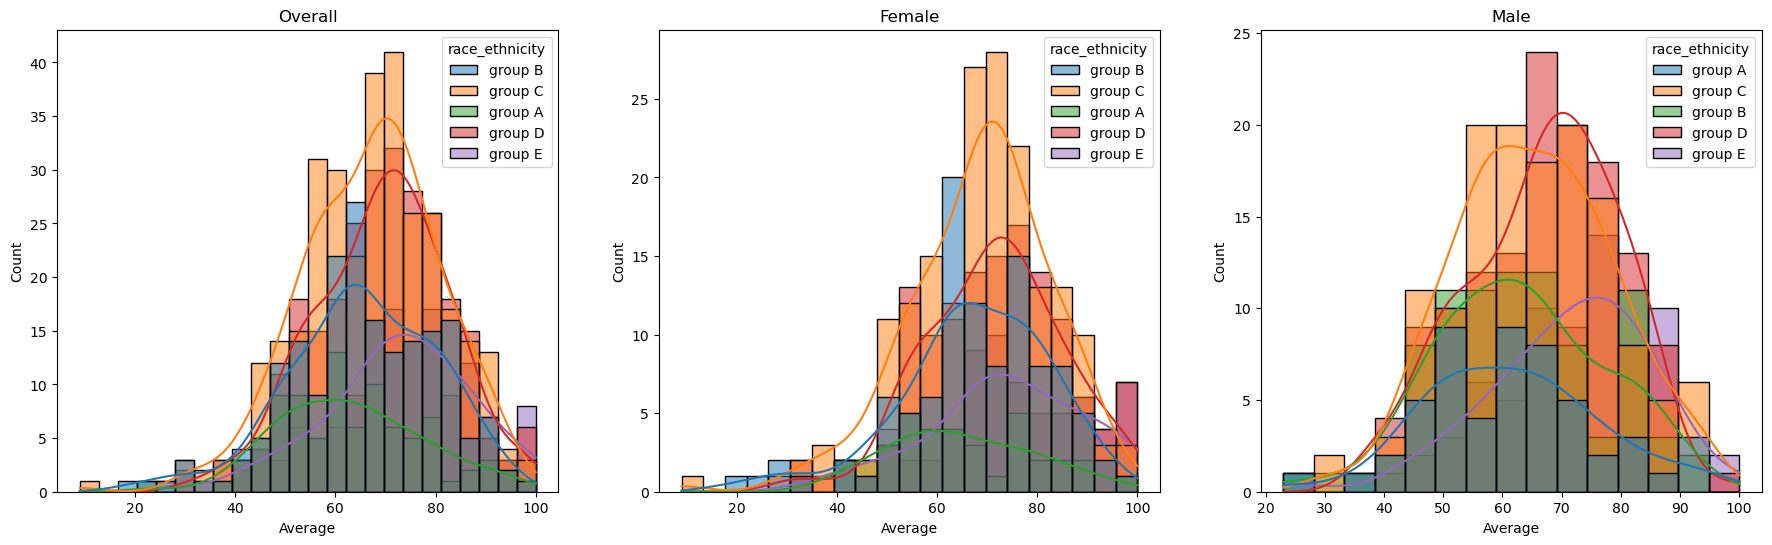

In [208]:
plt.subplots(1,3,figsize=(22,6))
a=plt.subplot(131)
a.set_title('Overall')
sns.histplot(x='Average',data=df1,hue='race_ethnicity',kde=True)
b=plt.subplot(132)
b.set_title('Female')
sns.histplot(x='Average',data=df1[df1['gender']=='female'],hue='race_ethnicity',kde=True)
c=plt.subplot(133)
c.set_title('Male')
sns.histplot(x='Average',data=df1[df1['gender']=='male'],kde=True,hue='race_ethnicity')
plt.show()

- Students of race_ethnicity Group A and Group B have less average score than other Groups.

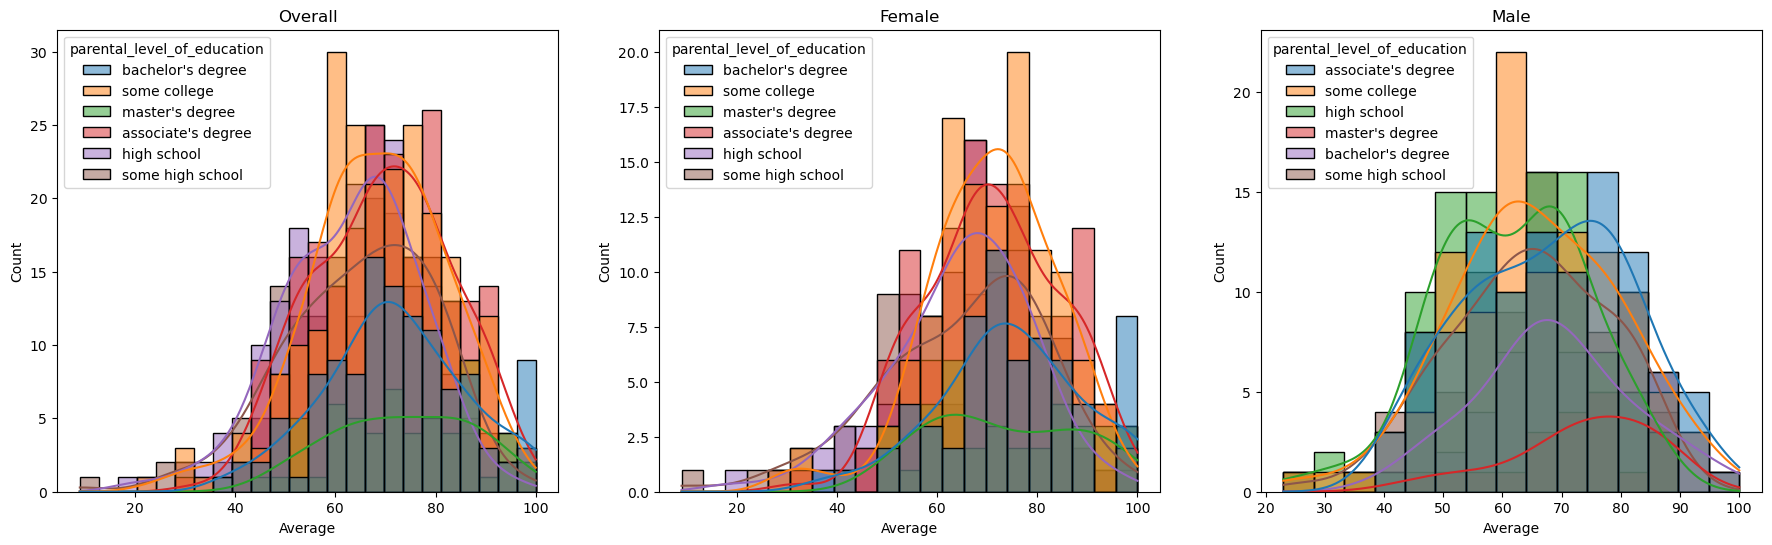

In [209]:
plt.subplots(1,3,figsize=(22,6))
a=plt.subplot(131)
a.set_title('Overall')
sns.histplot(x='Average',data=df1,hue='parental_level_of_education',kde=True)
b=plt.subplot(132)
b.set_title('Female')
sns.histplot(x='Average',data=df1[df1['gender']=='female'],hue='parental_level_of_education',kde=True)
c=plt.subplot(133)
c.set_title('Male')
sns.histplot(x='Average',data=df1[df1['gender']=='male'],kde=True,hue='parental_level_of_education')
plt.show()

- Overall, level of Education of parents don't have much impact on the average scores.
- However, Male students whose parents have masters degree tend to have higher average scores.

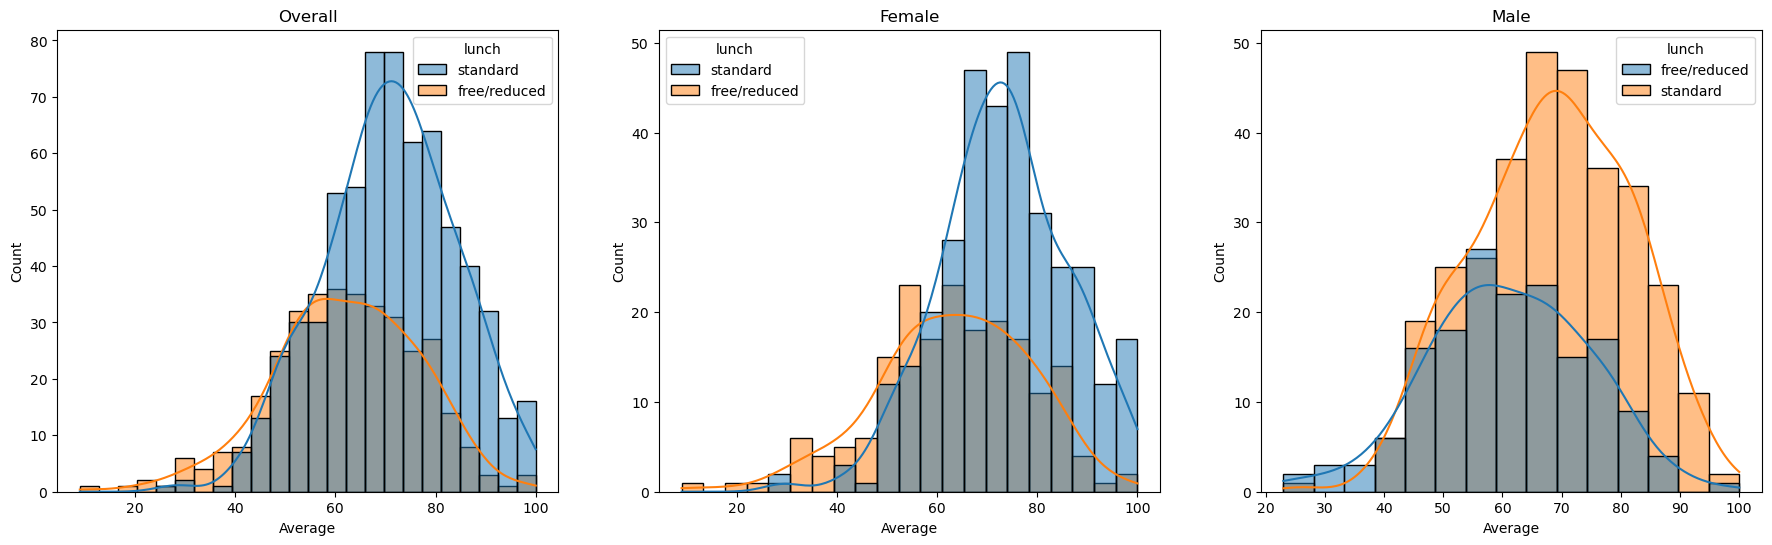

In [210]:
plt.subplots(1,3,figsize=(22,6))
a=plt.subplot(131)
a.set_title('Overall')
sns.histplot(x='Average',data=df1,hue='lunch',kde=True)
b=plt.subplot(132)
b.set_title('Female')
sns.histplot(x='Average',data=df1[df1['gender']=='female'],hue='lunch',kde=True)
c=plt.subplot(133)
c.set_title('Male')
sns.histplot(x='Average',data=df1[df1['gender']=='male'],kde=True,hue='lunch')
plt.show()

- Students who have standard lunch have higher average score compared to the students who have free/reduced lunch.

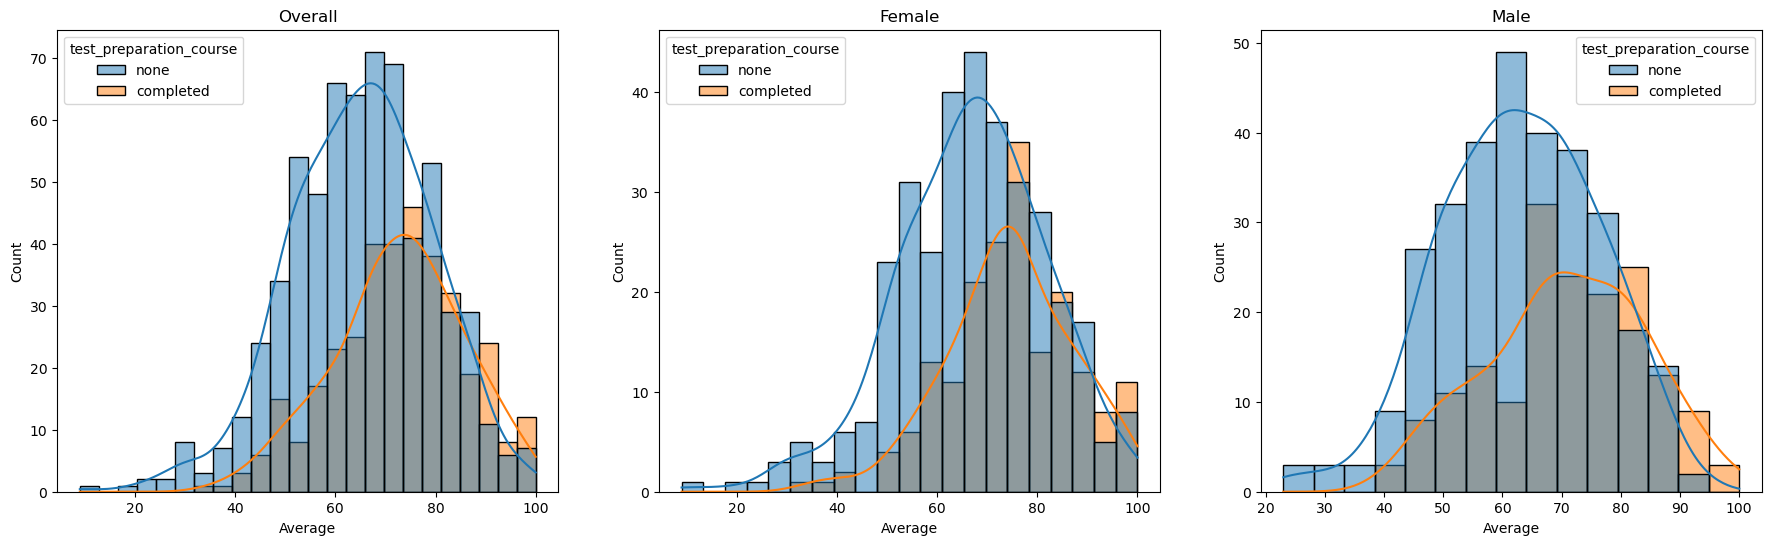

In [211]:
plt.subplots(1,3,figsize=(22,6))
a=plt.subplot(131)
a.set_title('Overall')
sns.histplot(x='Average',data=df1,hue='test_preparation_course',kde=True)
b=plt.subplot(132)
b.set_title('Female')
sns.histplot(x='Average',data=df1[df1['gender']=='female'],hue='test_preparation_course',kde=True)
c=plt.subplot(133)
c.set_title('Male')
sns.histplot(x='Average',data=df1[df1['gender']=='male'],kde=True,hue='test_preparation_course')
plt.show()

- Students who completed test preparation course have higher average score.

### Conclusion

- Overall, Gender, Ethnicity, Lunch and test preparation course all affect Test Scores but Parent's Proifency seem to have no affect.
- For Male Students, Gender, Ethnicity, Lunch, test preparation course and Parent's Proifency all affect Test Scores.
- For Females, Gender,Ethnicity,Lunch and test preparation course all affect Test Scores but Parent's Proifency seem to have no affect.

So, Key factors that affect student's performance in school are:
- Gender
- Ethnicity
- Lunch
- Test Preparation Course.

#### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the machine learning algorithm. Some key aspects of feature engineering for this dataset are:

1. Data cleaning: The data may contain missing values, incorrect values, duplicates, etc. These issues need to be identified and addressed before feature engineering,but there is none in this dataset.

2. Feature creation: New features can be created from the existing features to provide more information. For example:

- Create indicator variables (binary 0/1 features) for categories like gender, race, lunch type, etc. This helps ML models deal with categorical variables.

- Create interaction features between variables that may have an effect together. For example, an interaction between 'gender' and 'lunch'.

3. Feature selection: Identify and remove features that are irrelevant, redundant or have high correlation. This reduces overfitting and improves model performance.

4. Feature scaling: Since features may be on different scales, they need to be scaled (e.g. standardized or normalized) to a common scale. This helps algorithms converge faster.

5. Encoding nonlinear relationships: Engineer features that can capture nonlinear relationships between variables, e.g. polynomial features, interactions, buckets.

So in summary, feature engineering involves transforming, combining and selecting features in a way that represents the underlying problem better for the machine learning model.

In [10]:
"""
I Selected and transformed the variable in following ways:
"""

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

df_encoded = pd.DataFrame(ohe.fit_transform(df1[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]).toarray(),  
                          columns=ohe.get_feature_names_out())

df_concat = pd.concat([ df_encoded,df1[['math_score','reading_score','writing_score','Total','Average']]], 
                       axis=1)

In [11]:
df_concat.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,...,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score,Total,Average
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,72,72,74,218,72.666667
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,69,90,88,247,82.333333
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,90,95,93,278,92.666667
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,47,57,44,148,49.333333
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,76,78,75,229,76.333333
